In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv(r'\Users\James\Desktop\Datasets\books.csv')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
bookID                11127 non-null int64
title                 11127 non-null object
authors               11127 non-null object
average_rating        11127 non-null object
isbn                  11127 non-null object
isbn13                11127 non-null object
language_code         11127 non-null object
num_pages             11127 non-null object
ratings_count         11127 non-null int64
text_reviews_count    11127 non-null int64
publication_date      11127 non-null object
publisher             11127 non-null object
Unnamed: 12           4 non-null object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB
None


num_pages should be int but is an object

In [3]:
print(df[df['num_pages'].str.contains('[^-0-9\/]+')])

      bookID                                              title  \
3348   12224  Streetcar Suburbs: The Process of Growth in Bo...   
4702   16914                  The Tolkien Fan's Medieval Reader   
5877   22128                     Patriots (The Coming Collapse)   
8979   34889  Brown's Star Atlas: Showing All The Bright Sta...   

                                       authors  \
3348                           Sam Bass Warner   
4702  David E. Smith (Turgon of TheOneRing.net   
5877                              James Wesley   
8979                                     Brown   

                                         average_rating  isbn      isbn13  \
3348                                  Jr./Sam B. Warner  3.58   674842111   
4702   one of the founding members of this Tolkien w...  3.58  1593600119   
5877                                             Rawles  3.63  156384155X   
8979                                     Son & Ferguson     0   851742718   

     language_code num_page

Looking at the rows with strings for num_pages shows that
in the average_rating column the incorrect information
has been input. From here the columns have been shifted.
average_rating values becomes the isbn, isbn to isbn 13
and so on. There are only four instances of these books
so removing the rows is fine. The books are also not any
major books that lay heavily as an outliar.

Now num_pages can be converted to a numeric
column

In [4]:
df = df.drop(df[df['num_pages'].str.contains('[^-0-9\/]+')].index)
df['num_pages'] = pd.to_numeric(df['num_pages'])

In [5]:
print(df.info())
print(df['isbn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11126
Data columns (total 13 columns):
bookID                11123 non-null int64
title                 11123 non-null object
authors               11123 non-null object
average_rating        11123 non-null object
isbn                  11123 non-null object
isbn13                11123 non-null object
language_code         11123 non-null object
num_pages             11123 non-null int64
ratings_count         11123 non-null int64
text_reviews_count    11123 non-null int64
publication_date      11123 non-null object
publisher             11123 non-null object
Unnamed: 12           0 non-null object
dtypes: int64(4), object(9)
memory usage: 1.2+ MB
None
698115910     1
140441123     1
006054564X    1
804001480     1
765309963     1
             ..
618574999     1
689869207     1
771008740     1
030727411X    1
29221307      1
Name: isbn, Length: 11123, dtype: int64


I don't care about isbn and isbn13 as they are
just unique codes to identify a book.
As seen above there are no overlaps with the
unique codes which is good as no two books
should have the same.
isbn13 contains overlaps but due only to the
fact that they are in standard form.

From df.info I can see that the publication_date
column has no consistent date format.

In [6]:
print(df['publication_date'])
df = df.drop(['isbn','isbn13'],axis=1)
df['publication_date'] = \
    pd.to_datetime(df['publication_date'],
    errors='coerce').dt.strftime('%d/%m/%Y')

0         9/16/2006
1          09-01-04
2          11-01-03
3          05-01-04
4         9/13/2004
            ...    
11122    12/21/2004
11123      12-01-88
11124      08-01-93
11125     2/27/2007
11126     5/28/2006
Name: publication_date, Length: 11123, dtype: object


In [7]:
print(df['publication_date'].value_counts())
print(df.info())

01/10/2005    56
01/11/2005    53
01/09/2006    51
01/10/2006    48
01/11/2006    40
              ..
15/06/1976     1
30/08/2002     1
31/03/2000     1
20/07/2001     1
29/05/1998     1
Name: publication_date, Length: 3677, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11126
Data columns (total 11 columns):
bookID                11123 non-null int64
title                 11123 non-null object
authors               11123 non-null object
average_rating        11123 non-null object
language_code         11123 non-null object
num_pages             11123 non-null int64
ratings_count         11123 non-null int64
text_reviews_count    11123 non-null int64
publication_date      11123 non-null object
publisher             11123 non-null object
Unnamed: 12           0 non-null object
dtypes: int64(4), object(7)
memory usage: 1.0+ MB
None


average_rating should have type float

In [8]:
print(df['average_rating'].unique())
df['average_rating'] = pd.to_numeric(df['average_rating'])

['4.57' '4.49' '4.42' '4.56' '4.78' '3.74' '4.73' '4.38' '4.22' '4.21'
 '3.44' '3.87' '4.07' '3.9' '3.83' '3.86' '3.91' '3.93' '4.59' '4.5'
 '4.36' '4.53' '3.84' '3.72' '4' '3.88' '4.33' '3.45' '3.76' '3.6' '4.06'
 '4.17' '3.55' '3.98' '4.13' '3.95' '4.24' '4.34' '3.92' '4.23' '3.75'
 '3.94' '3.77' '4.46' '3.68' '3.99' '3.25' '3.89' '3.82' '3.78' '4.01'
 '4.35' '4.28' '3.34' '3.67' '3.48' '3.5' '3.62' '4.27' '3.39' '4.12'
 '4.08' '4.05' '3.85' '2.99' '4.19' '3.71' '4.2' '3.65' '3.4' '4.11'
 '3.42' '4.02' '3.69' '4.1' '3.66' '4.61' '4.04' '3.97' '4.14' '3.57'
 '3.43' '3.22' '3.64' '3.96' '3.8' '3.81' '3.79' '3.23' '4.15' '4.39'
 '4.03' '3.73' '3.51' '3.63' '3.09' '3.59' '4.29' '0' '4.25' '4.26' '3.61'
 '4.16' '4.55' '4.52' '3.41' '4.7' '4.18' '3.58' '4.51' '3.15' '3.31'
 '4.09' '3.49' '3.56' '4.47' '4.44' '3.7' '4.32' '4.4' '4.31' '4.43' '2.8'
 '3.46' '2.83' '4.62' '2.67' '4.45' '4.3' '5' '3.1' '3.08' '3.27' '3.33'
 '3' '4.67' '4.63' '3.52' '3.36' '3.54' '3.17' '4.37' '3.29' '4.64' '3.3

In [9]:
print(df.info())
print(df['language_code'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11126
Data columns (total 11 columns):
bookID                11123 non-null int64
title                 11123 non-null object
authors               11123 non-null object
average_rating        11123 non-null float64
language_code         11123 non-null object
num_pages             11123 non-null int64
ratings_count         11123 non-null int64
text_reviews_count    11123 non-null int64
publication_date      11123 non-null object
publisher             11123 non-null object
Unnamed: 12           0 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB
None
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
srp         1
nor         1
ale         1
glg         1
wel         1
ara         1
nl          1
gla        

en-(US,GB,CA) for the column langauge_codes are
United States, Great Briton, Canadian. They are all the
same so i will condense them to all say eng

In [10]:
language_list = ['en-US','en-GB','en-CA']
df['language_code'] = df['language_code'].apply(lambda x: 'eng' if x in language_list else x)
print(df['language_code'].value_counts())

eng    10537
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
enm        3
lat        3
rus        2
swe        2
nor        1
srp        1
glg        1
ale        1
nl         1
wel        1
ara        1
gla        1
tur        1
msa        1
Name: language_code, dtype: int64


Only look at books with eng language as they will
have different markets

Analysis
-------------------------
How the number of text_reviews correlates to average_rating

How publication date and rating/text review changes

Top rated authors with the number of books they have

Publishers average rating with books they have published

Publishes most active years

Publisher average pages they

In [11]:
df = df[df['ratings_count']>0]
df = df[df['language_code']=='eng']

In [12]:
pub_avg = df.groupby('publisher').agg({'average_rating':'mean','ratings_count':'sum'}).sort_values((['average_rating','ratings_count']),ascending=(False,True))

pub_avg = pub_avg[pub_avg>0]
print(pub_avg.head(35))

                                          average_rating  ratings_count
publisher                                                              
Academica Press                                     5.00              1
Boosey & Hawkes Inc                                 5.00              1
Schirmer Mosel                                      5.00              1
T&T Clark Int'l                                     5.00              1
University Press of New England                     5.00              1
Chartwell Books                                     5.00              2
Courage Books                                       5.00              2
Vantage Press                                       5.00              4
Square One Publishers                               5.00              5
Welcome Books                                       4.88              8
Teacher's Pet Publications                          4.86              5
Universe Publishing(NY)                             4.83        


path = r'\Users\James\Desktop/'
df.to_excel(path+'book_use.xlsx')

In [13]:
publisher_df = df.groupby('publisher')['ratings_count'].sum()
publisher_df = publisher_df[publisher_df > 1000000]
print(publisher_df)
df = df[df.publisher.isin(publisher_df.index)]

publisher
Alfred A. Knopf                              2621585
Algonquin Books                              1263785
Anchor                                       2350366
Anchor Books                                 2997421
Arthur A. Levine Books / Scholastic Inc.     2293963
Back Bay Books                               4198407
Ballantine Books                             3014519
Bantam                                       3949319
Berkley                                      1619331
Dell Publishing Company                      2089909
Delta                                        2086577
Dial Press                                   1376955
Disney Hyperion Books                        1777276
Ember                                        1756292
Grand Central Publishing                     3586469
Harper Perennial                             2199699
Harper Perennial Modern Classics             1034834
HarperCollins                                2845504
HarperCollinsPublishers             

In [14]:
print(df.info())
print(df.title)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845 entries, 0 to 11124
Data columns (total 11 columns):
bookID                2845 non-null int64
title                 2845 non-null object
authors               2845 non-null object
average_rating        2845 non-null float64
language_code         2845 non-null object
num_pages             2845 non-null int64
ratings_count         2845 non-null int64
text_reviews_count    2845 non-null int64
publication_date      2845 non-null object
publisher             2845 non-null object
Unnamed: 12           0 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 266.7+ KB
None
0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11

In [15]:
from selenium.webdriver.common.keys import Keys
from msedge.selenium_tools import Edge, EdgeOptions
options = EdgeOptions()
options.use_chromium = True

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

type = []
driver = webdriver.Edge(executable_path=r'\Users\James\Desktop\HP\msedgedriver.exe')
driver.get('https://www.google.co.uk/webhp?hl=en&sa=X&ved=0ahUKEwjxtd6goof3AhWGN8AKHW8hCogQPAgI')
time.sleep(1.5)
agree = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/button[2]')
agree.click()
j = 1
for i in df.title.unique():
    print(j)
    j += 1
    driver.get('https://www.google.co.uk/webhp?hl=en&sa=X&ved=0ahUKEwjxtd6goof3AhWGN8AKHW8hCogQPAgI')
    time.sleep(1.75)
    #WebDriverWait(driver, 1).until(EC.presence_of_element_located((By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")))
    search = driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search.click()
    search.send_keys(str(i) + ' book genre')
    search.send_keys(Keys.ENTER)
    try:
        time.sleep(1.5)
        #WebDriverWait(driver, 0).until(EC.presence_of_element_located((By.XPATH, "/html/body/div[7]/div/div[10]/div[2]/div/div/div[2]/div/div[2]/div/div/div/div[2]/div/span")))
        genre = []
        find = []
        for i in range(1,10):
            try:
                find = driver.find_element_by_xpath('/html/body/div[7]/div/div[7]/div[1]/div/div/div[1]/div/div[1]/g-scrolling-carousel/div[1]/div/div/a['+str(i)+']/div/div/div').text
                genre.append(find)
            except:
                try:
                    find = driver.find_element_by_xpath('/html/body/div[7]/div/div[10]/div[1]/div[2]/div[2]/div/div/div[1]/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[1]/div/div[1]/div[2]/div').text
                    genre.append(find)
                    if genre != []:
                        type.append(genre[0])
                        break
                except:
                    if find == []:
                        type.append('NaN')
                        break
                    else:
                        genre = ','.join(genre)
                        type.append(genre)
                        print('FOUND:' + genre)
                        break
    except:
        pass

In [ ]:
df_type = pd.DataFrame(type, columns=['genre'])
filepath = r'C:\Users\James\Desktop/'
df_type.to_csv(filepath+'bookgenrereal.csv')

In [19]:
df_genres = pd.read_csv(r'\Users\James\Desktop\Datasets\Genres.csv', encoding='cp1252')
print(df_genres.info())
print(df_genres)
df_title = df.title.isna()
print(df.title.tail(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 1 columns):
['Action', 'Romance', 'Adventure', 'Fantasy', "Children's film", 'Mystery', 'Narrative']    2708 non-null object
dtypes: object(1)
memory usage: 21.3+ KB
None
     ['Action', 'Romance', 'Adventure', 'Fantasy', "Children's film", 'Mystery', 'Narrative']
0     ['Novel', 'Young adult fiction', 'Fantasy Fict...                                      
1     ['Novel', 'Fantasy Fiction', 'Bildungsroman', ...                                      
2                          ['Fantasy Fiction', 'Novel']                                      
3                                                    []                                      
4                                                    []                                      
...                                                 ...                                      
2703                                                 []                      

In [20]:
print(df_title[df_title.isna()])

Series([], Name: title, dtype: bool)


In [21]:
print(df_genres.unique())
print(len(df.title.unique()))

AttributeError: 'DataFrame' object has no attribute 'unique'

df_type = pd.DataFrame(df.title.unique(), columns=['title'])
filepath = r'C:\Users\James\Desktop/'
df_type.to_csv(filepath+'titleofbooks.csv')

In [22]:
df_genre_and_titles = pd.read_csv(r'\Users\James\Desktop\Book genre and titles.csv')
print(df_genre_and_titles)

      Index1                                              genre  \
0          0  Action,Romance,Adventure,Fantasy,Children's fi...   
1          1          Novel,Young adult fiction,Fantasy Fiction   
2          2  Novel,Fantasy Fiction,Bildungsroman,High fanta...   
3          3                              Fantasy Fiction,Novel   
4          4                                                NaN   
...      ...                                                ...   
2703    2703                                                NaN   
2704    2704                                                NaN   
2705    2705                                   Literary fiction   
2706    2706                                            Fiction   
2707    2707                                                NaN   

                                                  title  
0     Harry Potter and the Half-Blood Prince (Harry ...  
1     Harry Potter and the Order of the Phoenix (Har...  
2     Harry Potter an

In [23]:
df_genre_and_titles = df_genre_and_titles.dropna().reset_index(drop=True)
df_genre_and_titles = df_genre_and_titles.drop('Index1',axis=1)
print(df_genre_and_titles)

                                                  genre  \
0     Action,Romance,Adventure,Fantasy,Children's fi...   
1             Novel,Young adult fiction,Fantasy Fiction   
2     Novel,Fantasy Fiction,Bildungsroman,High fanta...   
3                                 Fantasy Fiction,Novel   
4                                     Travel literature   
...                                                 ...   
1966         Short story,Fiction,Short story collection   
1967                        Novel,Fiction,Autobiography   
1968              Children's literature,Fantasy Fiction   
1969                                   Literary fiction   
1970                                            Fiction   

                                                  title  
0     Harry Potter and the Half-Blood Prince (Harry ...  
1     Harry Potter and the Order of the Phoenix (Har...  
2     Harry Potter and the Chamber of Secrets (Harry...  
3     Harry Potter and the Prisoner of Azkaban (Harr...  
4

In [24]:
print(df_genre_and_titles.genre.value_counts())

Biography                                                            138
Fiction                                                               92
Novel,Fiction                                                         60
Self-help book                                                        46
Non-fiction                                                           42
                                                                    ... 
Graphic novel,Comics,Contemporary fantasy                              1
Chick lit,Romance novel,Fiction,Humor,Comedy,Contemporary romance      1
Travel literature,Creative nonfiction                                  1
Novel,Historical Fiction,War story,Biographical Fiction                1
Drama,Fiction                                                          1
Name: genre, Length: 921, dtype: int64


In [25]:
df_genre_and_titles['publisher'] = df_genre_and_titles.title.apply(lambda x: df[df['title']==x]['publisher'].unique()[0])
print(df_genre_and_titles)

                                                  genre  \
0     Action,Romance,Adventure,Fantasy,Children's fi...   
1             Novel,Young adult fiction,Fantasy Fiction   
2     Novel,Fantasy Fiction,Bildungsroman,High fanta...   
3                                 Fantasy Fiction,Novel   
4                                     Travel literature   
...                                                 ...   
1966         Short story,Fiction,Short story collection   
1967                        Novel,Fiction,Autobiography   
1968              Children's literature,Fantasy Fiction   
1969                                   Literary fiction   
1970                                            Fiction   

                                                  title  \
0     Harry Potter and the Half-Blood Prince (Harry ...   
1     Harry Potter and the Order of the Phoenix (Har...   
2     Harry Potter and the Chamber of Secrets (Harry...   
3     Harry Potter and the Prisoner of Azkaban (Harr...

In [26]:

filepath = r'C:\Users\James\Desktop/'
df_genre_and_titles.to_csv(filepath+'TITLE.csv')

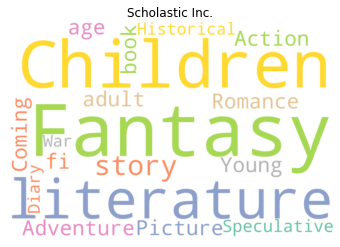

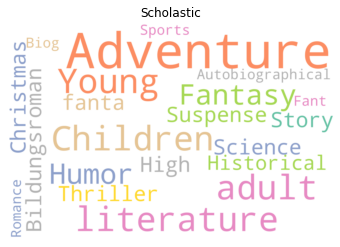

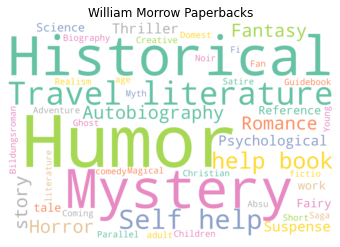

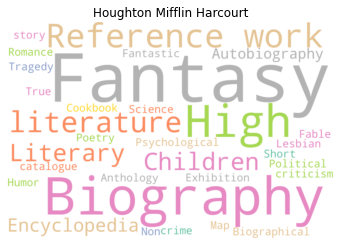

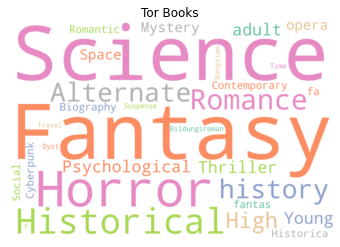

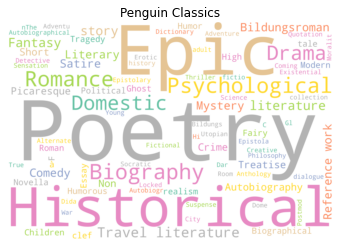

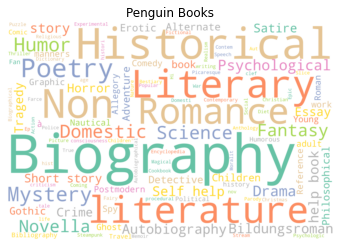

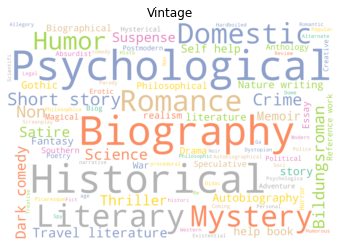

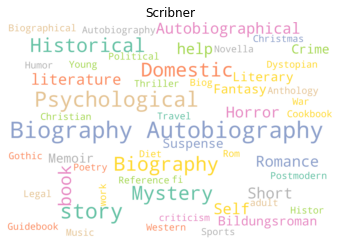

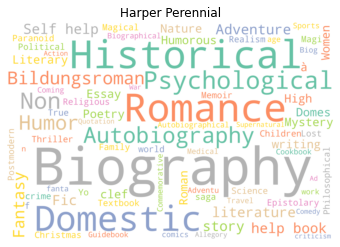

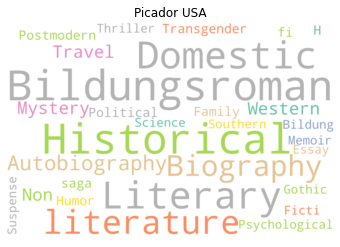

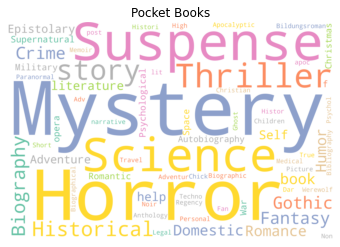

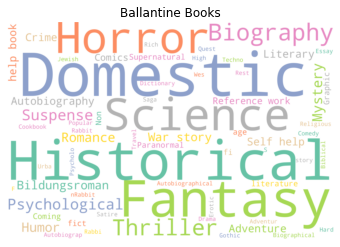

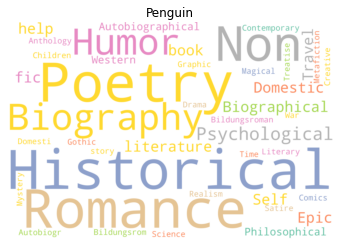

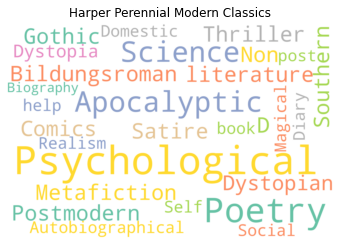

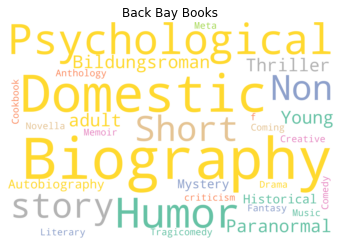

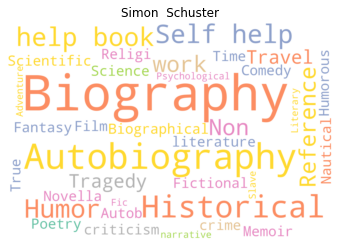

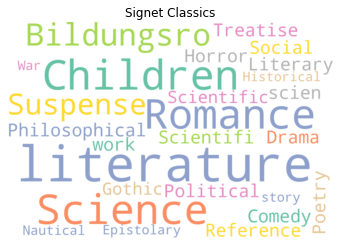

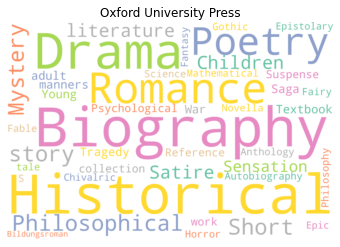

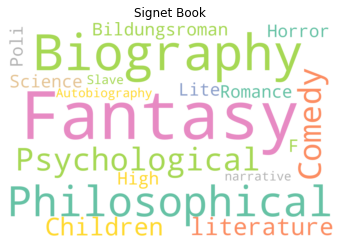

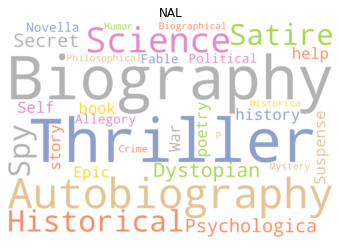

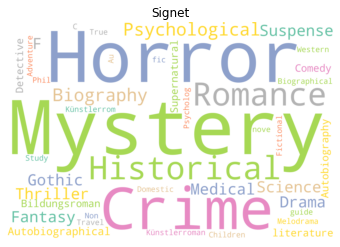

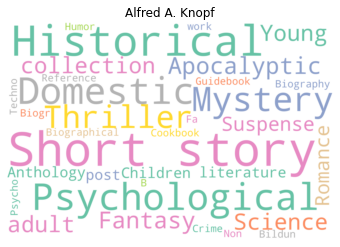

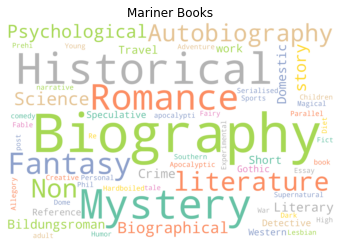

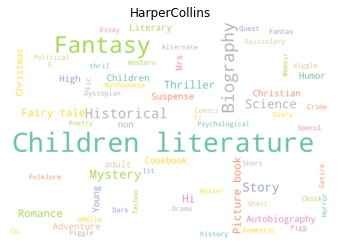

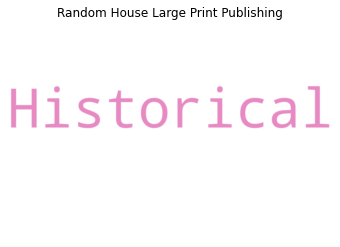

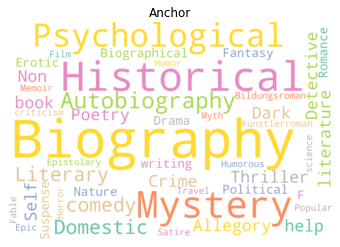

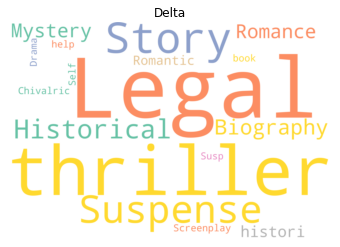

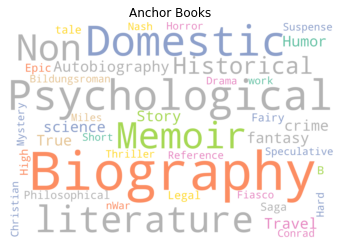

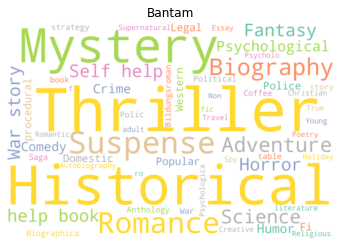

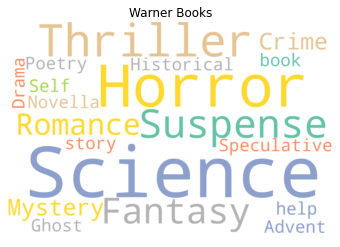

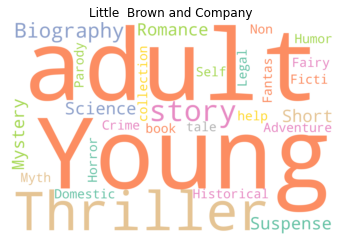

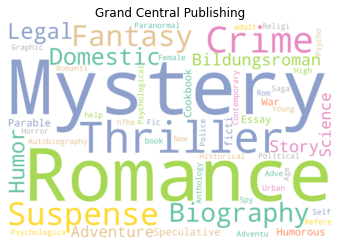

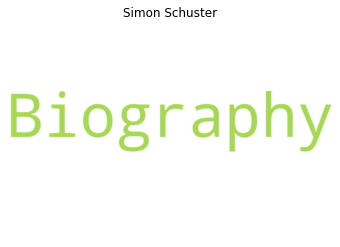

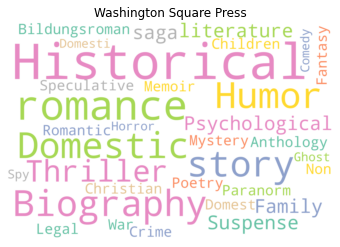

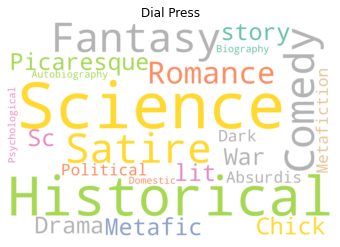

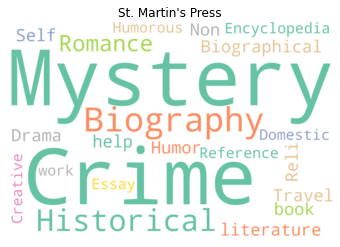

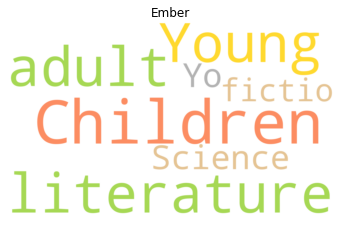

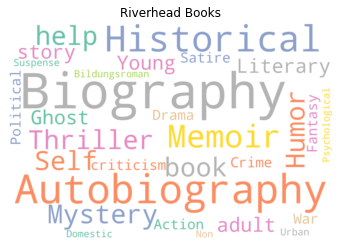

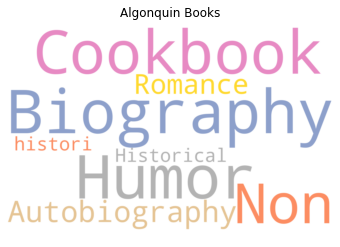

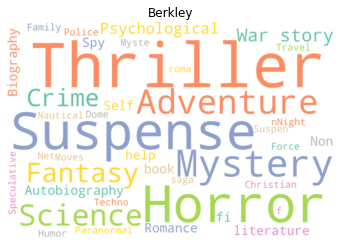

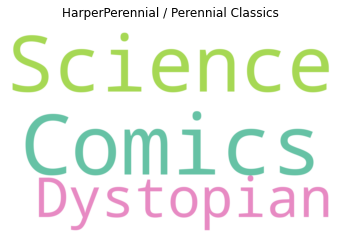

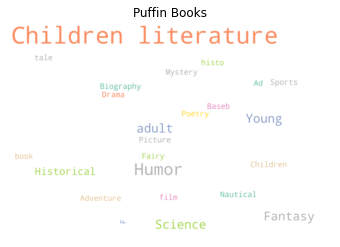

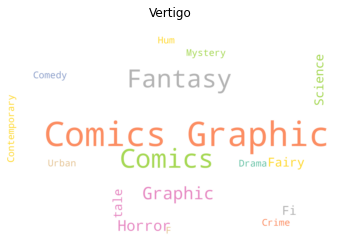

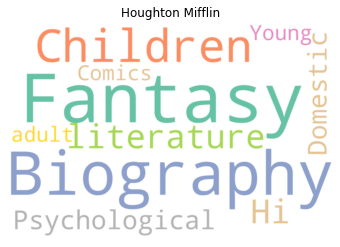

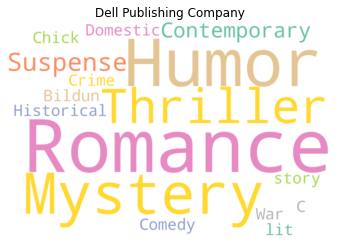

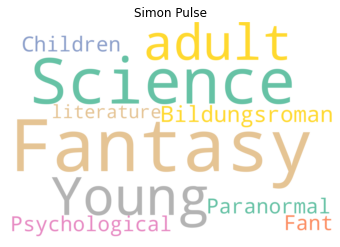

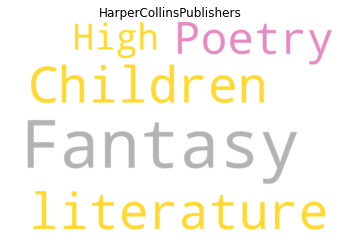

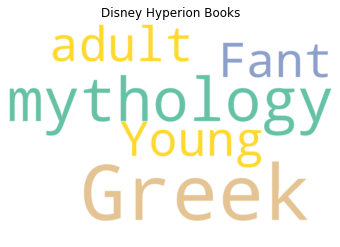

In [49]:
stopwords = set(STOPWORDS)
stopwords.update(["fiction", "non-fiction", "nonfiction", "novel", "Novel", "Fiction", "FictionNovel",
                  "Fiction Novel"])

for i in df_genre_and_titles.publisher.unique():
    text = df_genre_and_titles[df_genre_and_titles.publisher==i]['genre'].to_string()
    text = text.split(',')
    text = ' '.join(text)

    wordcloud = WordCloud(width = 3000, height = 2000,stopwords=stopwords, background_color="white",colormap='Set2').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    plt.axis('off')
    plt.show()
